In [1]:
from monk import workflow, utils
import signac
import glob
import gsd.hoomd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import freud
from schmeud import _schmeud

In [2]:
root = "/media/ian/Data2/monk/2d-esl"
project: signac.Project = signac.get_project(root)

In [25]:
for job in project:
    pot = job.sp.pot
    if pot == "KA_WCA":
        continue
    print(job.sp)
    files = sorted(glob.glob(job.fn("fine/equil_*.gsd")))[::-1]
    # sf_files = glob.glob(job.fn("fixed-analysis/*.parquet"))

    # for file in sorted(files):

    break

{'N': 32768, 'replica': 0, 'rho': 1.2, 'pot': 'KA_LJ'}


In [26]:
files

['/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.675.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.637.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.600.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.562.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.525.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.487.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.450.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.412.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.375.gsd',
 '/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equ

In [38]:
traj = gsd.hoomd.open(files[1])
len(traj)

589

In [37]:
traj[0].configuration.step

3900100

In [39]:
traj[0].configuration.step

3956600

In [41]:
t0 = None
x = []
y = []
for f in files:
    traj = gsd.hoomd.open(f)
    if t0 is None:
        t0 = traj[0].configuration.step

    time = (traj[0].configuration.step - t0) * 0.005
    time2 = (traj[-1].configuration.step - t0) * 0.005

    temp = float(f.split("_temp-")[-1].split(".gsd")[0])
    # print(f, len(traj))
    # print(temp, time)
    x.append(time)
    x.append(time2)
    y.append(temp)
    y.append(temp)

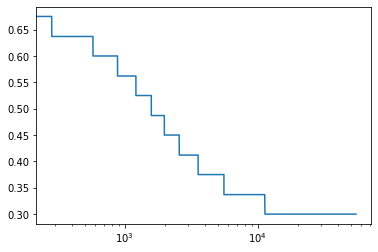

In [42]:
plt.plot(x, y)
plt.xscale('log')

In [47]:
from matplotlib import cm, colors
from matplotlib import collections  as mc

/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.675.gsd


/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.637.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.600.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.562.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.525.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.487.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.450.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.412.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.375.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.337.gsd
/media/ian/Data2/monk/2d-esl/workspace/a03bdc2a5be70a1e699a3f825fb8877b/fine/equil_temp-0.300.gsd


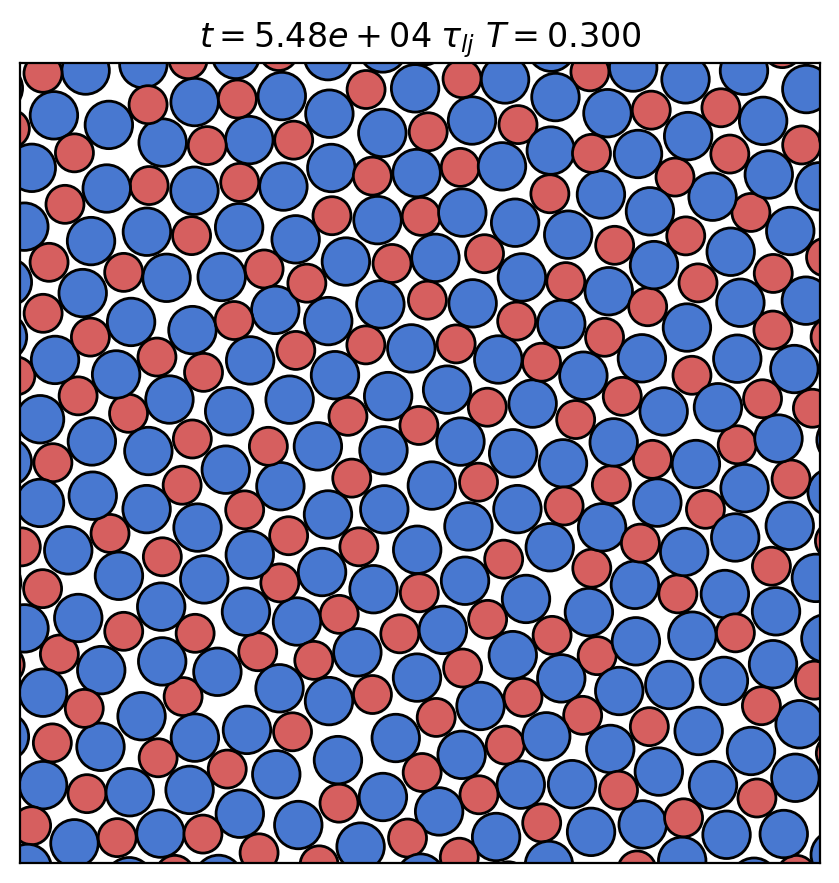

In [64]:
idx = 0

L = 10
l = L - 2

fig = plt.figure(figsize=(5, 5), dpi=200)

gs = fig.add_gridspec(1, 1,  width_ratios=[1], height_ratios=[1],
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[0])
ax.set_aspect('equal')

t0 = None

old = glob.glob("images/esl-*.png")
for f in old:
    os.remove(f)

for f in files:

    print(f)
    traj = gsd.hoomd.open(f)
    temp = float(f.split("_temp-")[-1].split(".gsd")[0])

    for snap in traj[::10]:
        ax.clear()
        box = snap.configuration.box
        Lx, Ly = box[:2]
        Lx, Ly

        pos = snap.particles.position

        if t0 is None:
            t0 = snap.configuration.step

        # dx = freud_box.wrap(pos - ref_pos)

        # pos = ref_pos + dx
        
        cond = (pos[:, 0] > -L) & (pos[:, 0] < L) & (pos[:, 1] > -L) & (pos[:, 1] < L)



        pos = pos[cond]
        ids = snap.particles.typeid[cond]

        patches = []

        for p, j in zip(pos, ids):
            if j == 0:
                D = 0.5*.95
                C = "#4878d0"
            else:
                D = 0.4*0.95
                C = "#d65f5f"

            patches.append(plt.Circle(p, D, facecolor=C, linewidth=1, edgecolor='k'))

        ax.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False,
            left=False,
            labelleft=False) # labels along the bottom edge are off

        # plt.tick_params(
        # axis='y',          # changes apply to the x-axis
        # which='both',      # both major and minor ticks are affected
        # left=False,      # ticks along the bottom edge are off
        # right=False,         # ticks along the top edge are off
        # labelbottom=False) # labels along the bottom edge are off

        ax.add_collection(mc.PatchCollection(patches, match_original=True))

        ax.set_xlim(-l, l)
        ax.set_ylim(-l, l)

        plt.title(fr"$t={(snap.configuration.step - t0)*0.005:.2e} \; \tau_{{lj}}$ $T={temp:.3f}$")

        plt.savefig(f"images/esl-{idx:03d}.png", dpi=200)
        
        idx += 1
        # break
    # break


In [67]:
import ffmpeg
import os
output_file = "eslv5.mp4"
if os.path.exists(output_file):
    os.remove(output_file)
(
ffmpeg
    .input("images/esl-*.png", pattern_type="glob", framerate=30)
    .output(output_file).run()
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


frame=  782 fps= 85 q=-1.0 Lsize=   28613kB time=00:00:25.96 bitrate=9026.9kbits/s speed=2.82x    
video:28603kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.036170%
[libx264 @ 0x589882decac0] frame I:6     Avg QP:19.50  size:100625
[libx264 @ 0x589882decac0] frame P:198   Avg QP:27.21  size: 47492
[libx264 @ 0x589882decac0] frame B:578   Avg QP:32.78  size: 33359
[libx264 @ 0x589882decac0] consecutive B-frames:  1.2%  0.5%  1.2% 97.2%
[libx264 @ 0x589882decac0] mb I  I16..4: 41.6%  0.0% 58.4%
[libx264 @ 0x589882decac0] mb P  I16..4:  4.8%  0.0%  8.4%  P16..4: 14.7% 19.0% 16.6%  0.0%  0.0%    skip:36.4%
[libx264 @ 0x589882decac0] mb B  I16..4:  1.4%  0.0%  3.7%  B16..8: 20.0% 19.0% 16.3%  direct: 2.1%  skip:37.5%  L0:51.0% L1:42.1% BI: 7.0%
[libx264 @ 0x589882decac0] coded y,u,v intra: 47.7% 24.4% 25.5% inter: 18.4% 2.7% 2.9%
[libx264 @ 0x589882decac0] i16 v,h,dc,p: 60% 26% 15%  0%
[libx264 @ 0x589882decac0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 24% 21% 19%  

(None, None)